In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [437]:
raw_data = pd.read_csv("fifa.csv")
raw_data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [438]:
raw_data['Skill Moves'].fillna(raw_data['Skill Moves'].median(), inplace = True)
raw_data['Weak Foot'].fillna(3, inplace = True)
raw_data['Preferred Foot'].fillna('Right', inplace = True)
raw_data['International Reputation'].fillna(1, inplace = True)
raw_data['Wage'].fillna('€200K', inplace = True)

In [439]:
raw_data.fillna(0, inplace = True)

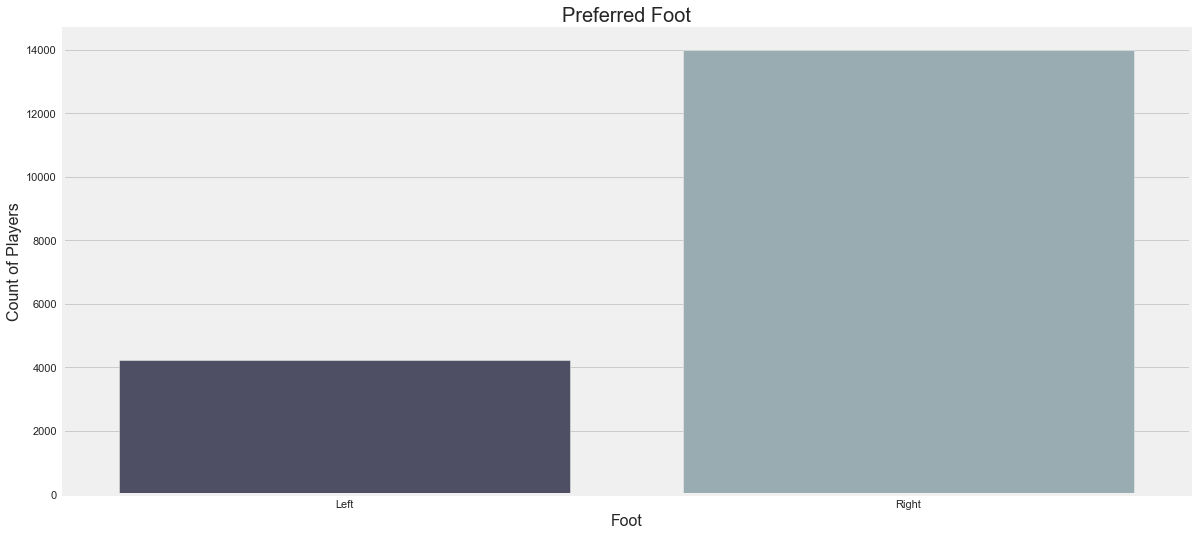

In [440]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Preferred Foot', data = raw_data, palette = 'bone')
ax.set_xlabel(xlabel = 'Foot', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Preferred Foot', fontsize = 20)
plt.show()

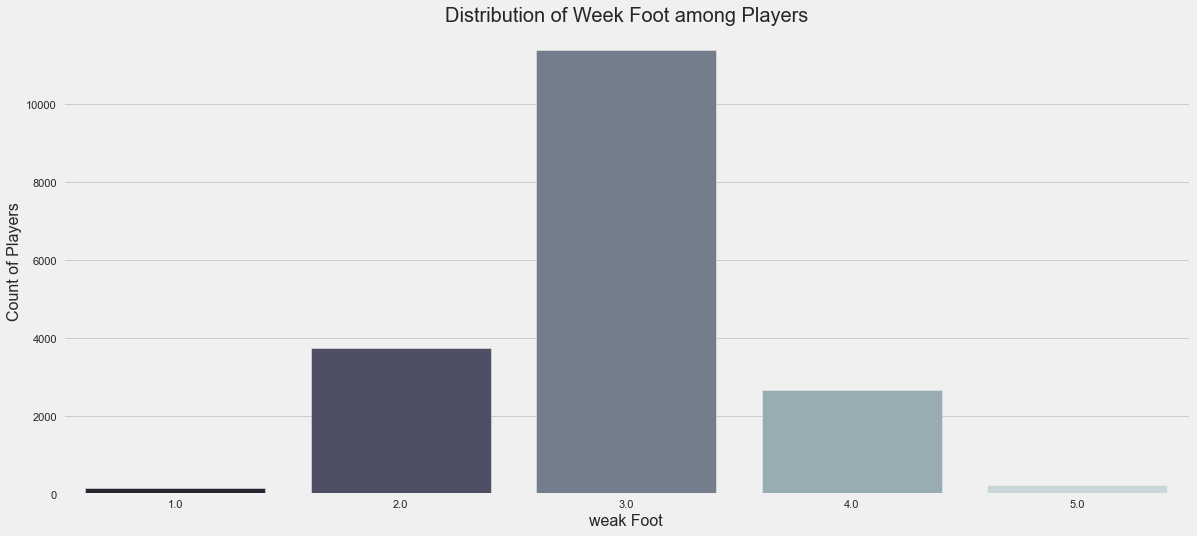

In [441]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Weak Foot', data = raw_data, palette = 'bone')
ax.set_xlabel(xlabel = 'weak Foot', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Week Foot among Players', fontsize = 20)
plt.show()


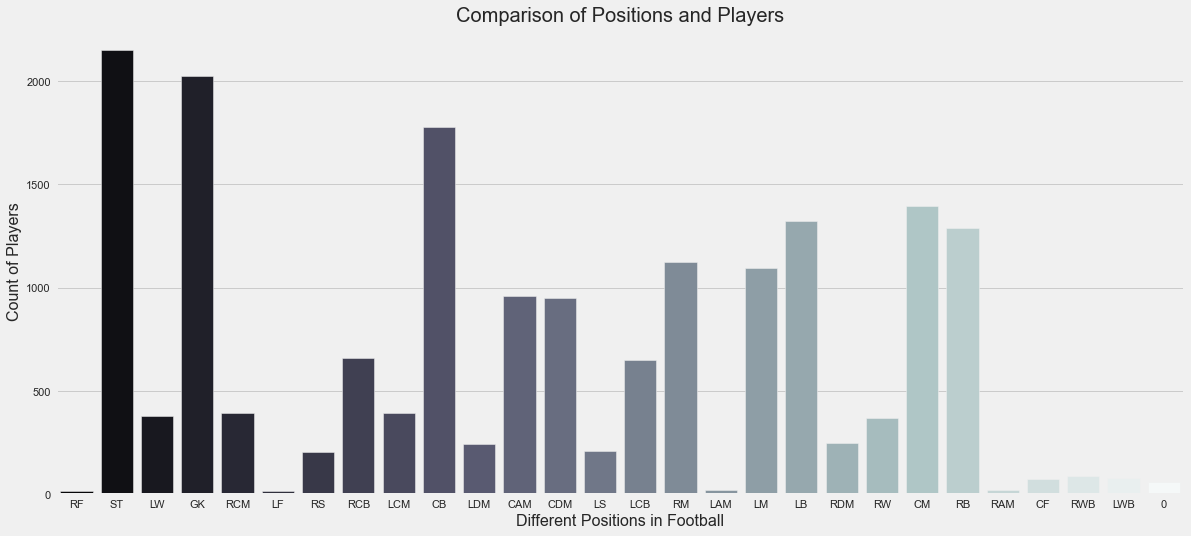

In [442]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = raw_data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [443]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)
raw_data['Value'] = raw_data['Value'].apply(lambda x: extract_value_from(x))
raw_data['Wage'] = raw_data['Wage'].apply(lambda x: extract_value_from(x))
raw_data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

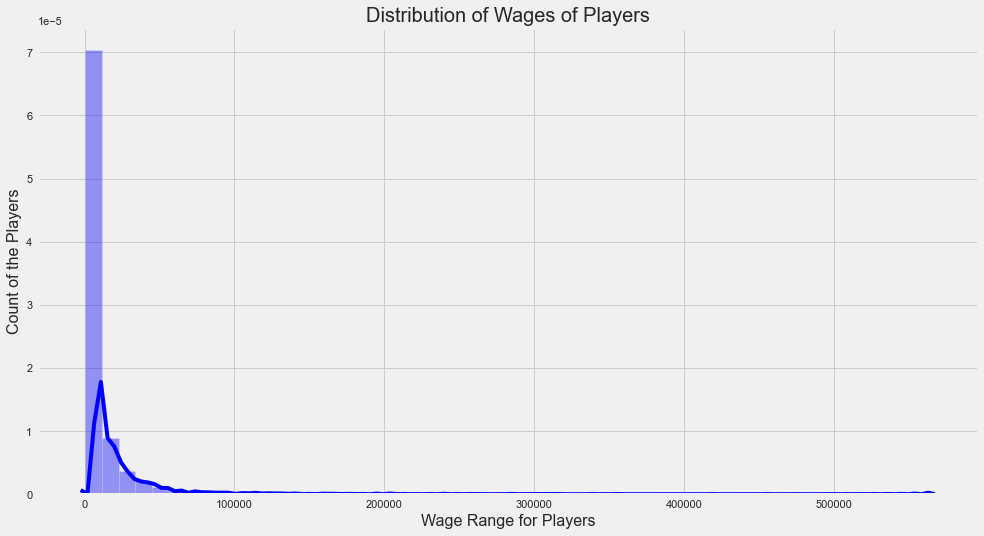

In [444]:
plt.style.use('fivethirtyeight')
sns.distplot(raw_data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.show()

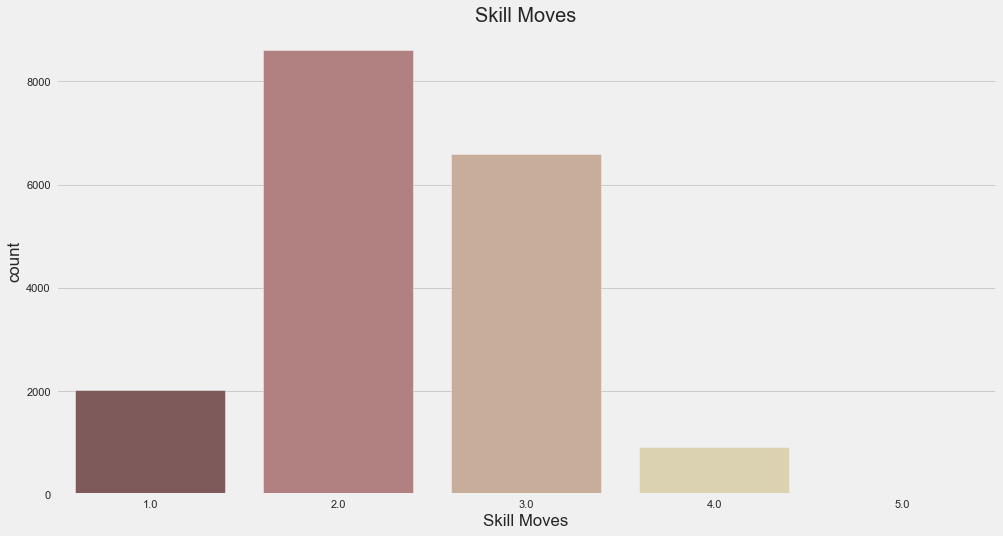

In [445]:
sns.countplot(raw_data['Skill Moves'], palette = 'pink')
plt.title('Skill Moves', fontsize = 20)
plt.show()

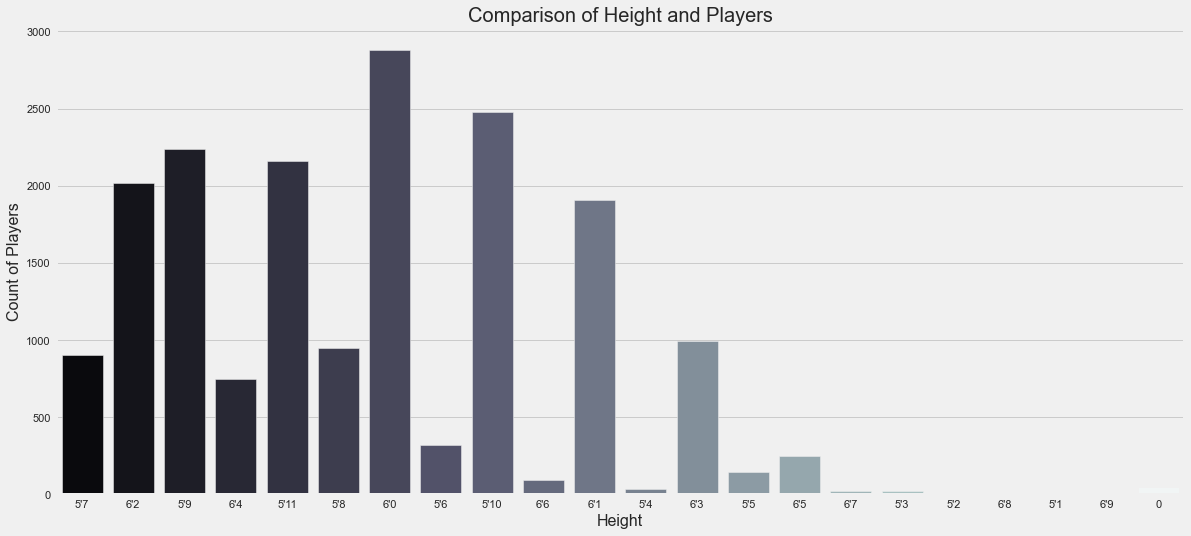

In [446]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Height', data = raw_data, palette = 'bone')
ax.set_xlabel(xlabel = 'Height', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Height and Players', fontsize = 20)
plt.show()

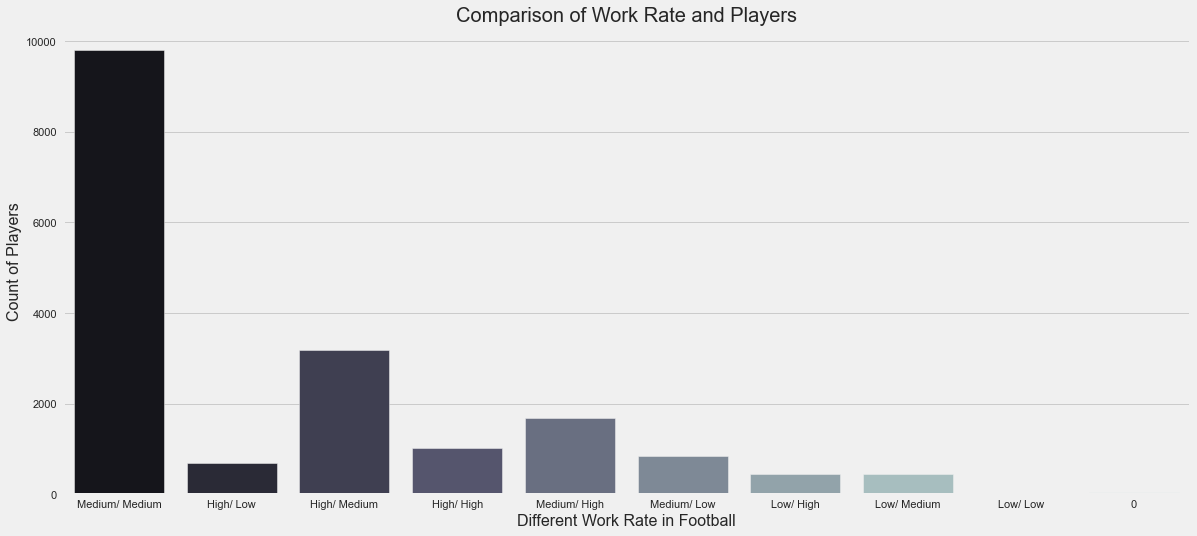

In [447]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Work Rate', data = raw_data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Work Rate in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Work Rate and Players', fontsize = 20)
plt.show()

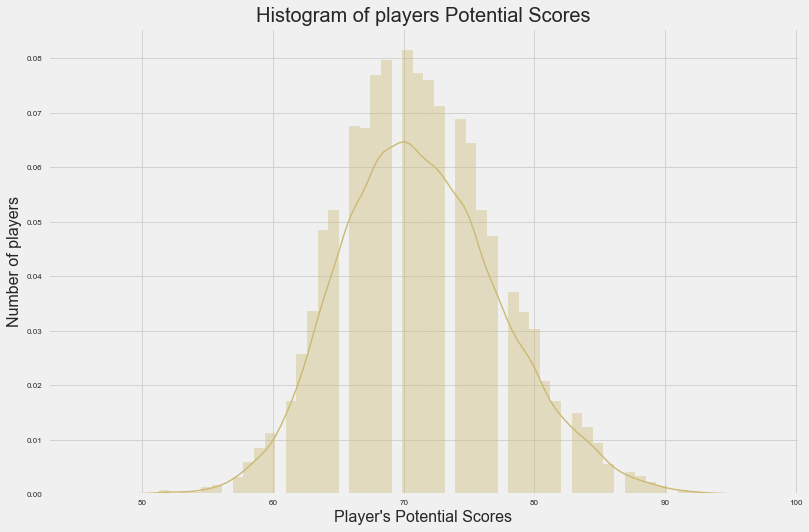

In [491]:

plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')
ax = sns.distplot(raw_data.Potential, bins = 58, kde = True, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

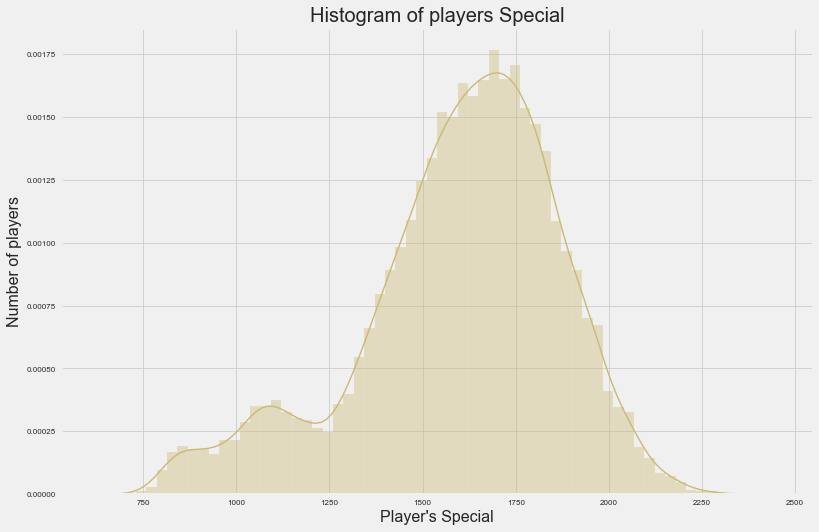

In [492]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')
ax = sns.distplot(raw_data.Special, bins = 58, kde = True, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Special", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Special', fontsize = 20)
plt.show()

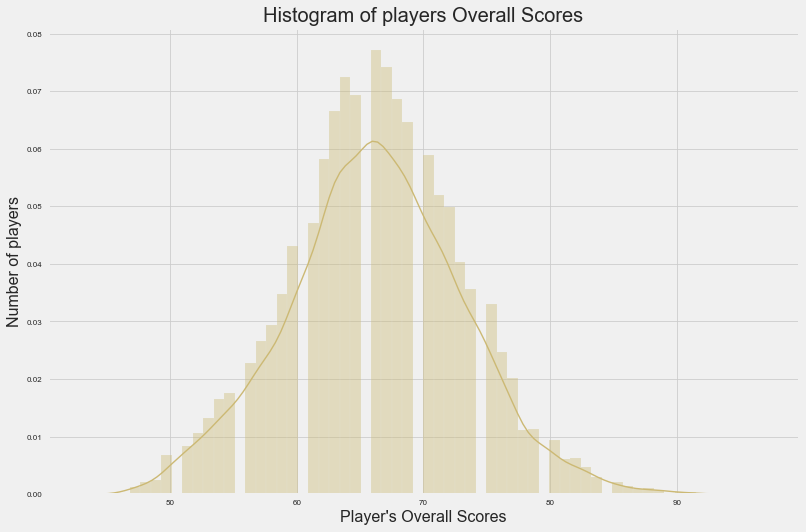

In [493]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')
ax = sns.distplot(raw_data.Overall, bins = 58, kde = True, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Overall Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Nationality')

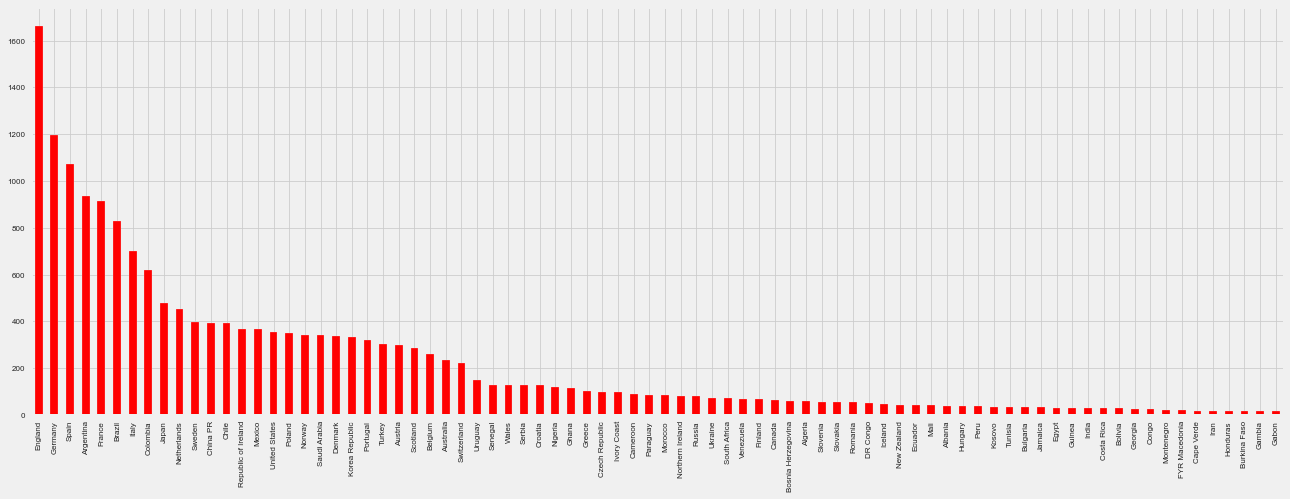

In [494]:
raw_data['Nationality'].value_counts().head(80).plot.bar(color = 'red', figsize = (20, 7))
ax.set_xlabel(xlabel = "Name of The Country", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Nationality', fontsize = 20)

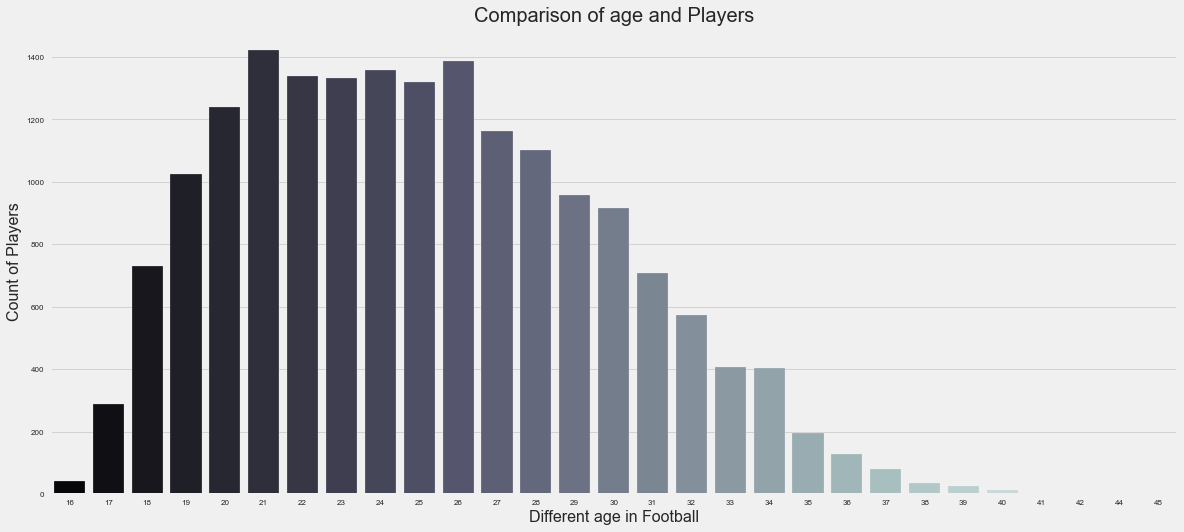

In [452]:
plt.figure(figsize = (18, 8))
plt.style.use('seaborn-dark-palette')
ax = sns.countplot('Age', data = raw_data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different age in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of age and Players', fontsize = 20)
plt.show()

In [453]:
selectedcolumns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(raw_data, columns = selectedcolumns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

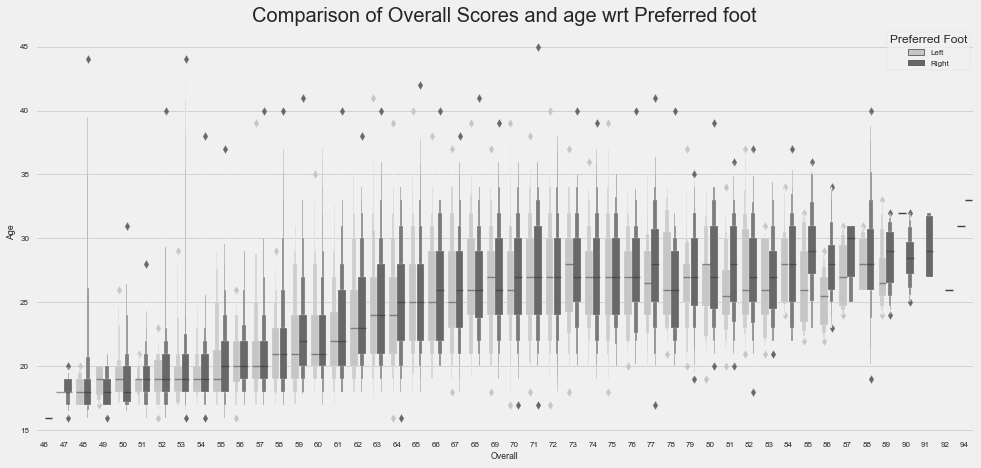

In [489]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(raw_data['Overall'], raw_data['Age'], hue = raw_data['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

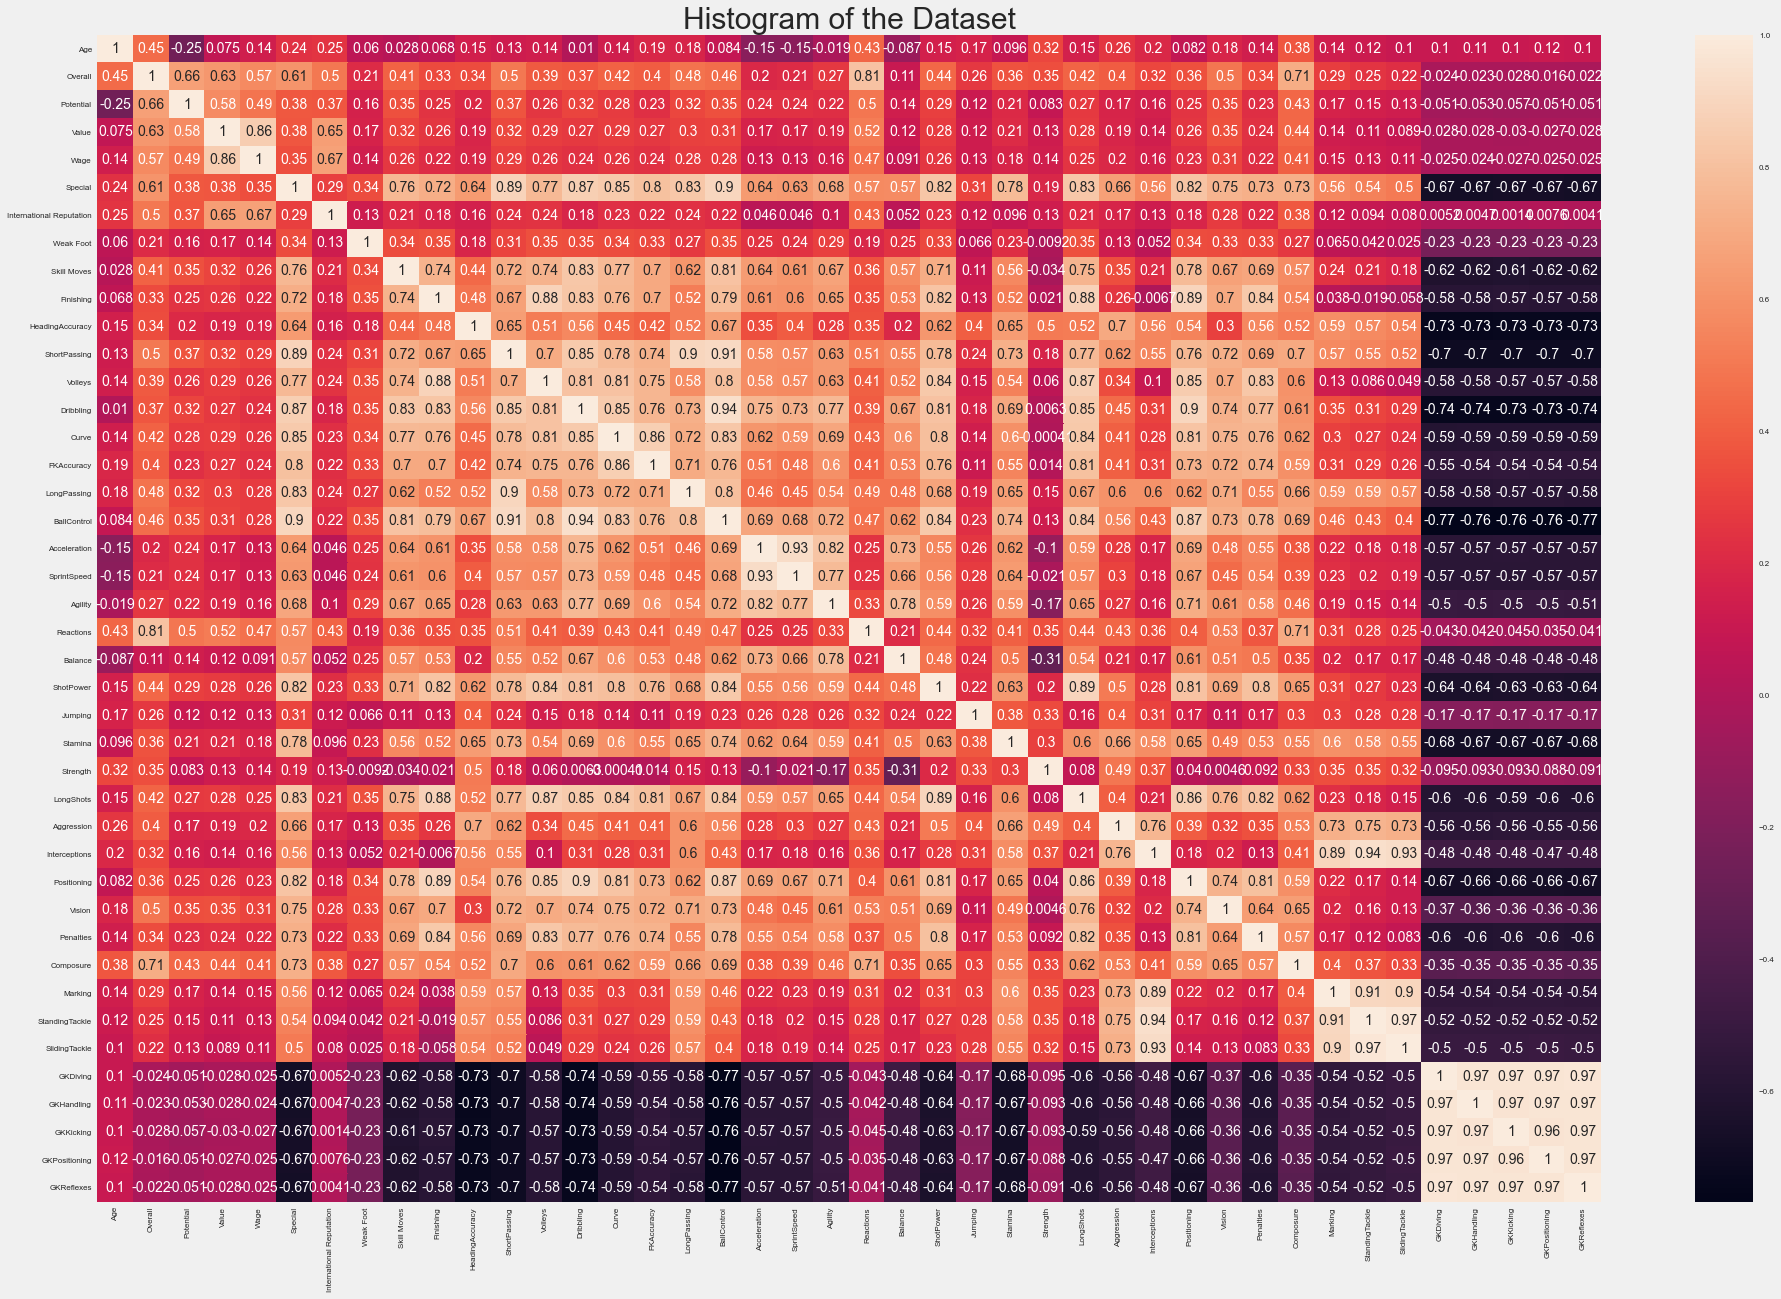

In [455]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)
plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [487]:
raw_data.iloc[raw_data.groupby(raw_data['Position'])['Overall'].idxmax()][['Position', 'Name',
                                                               'Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
5018,0,R. Raldes,37,0,Bolivia
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy


In [457]:
raw_data.iloc[raw_data.groupby(raw_data['Position'])['Potential'].idxmax()][['Position', 'Name',
                                                               'Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
13254,0,A. Aidonis,17,VfB Stuttgart,Germany
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia


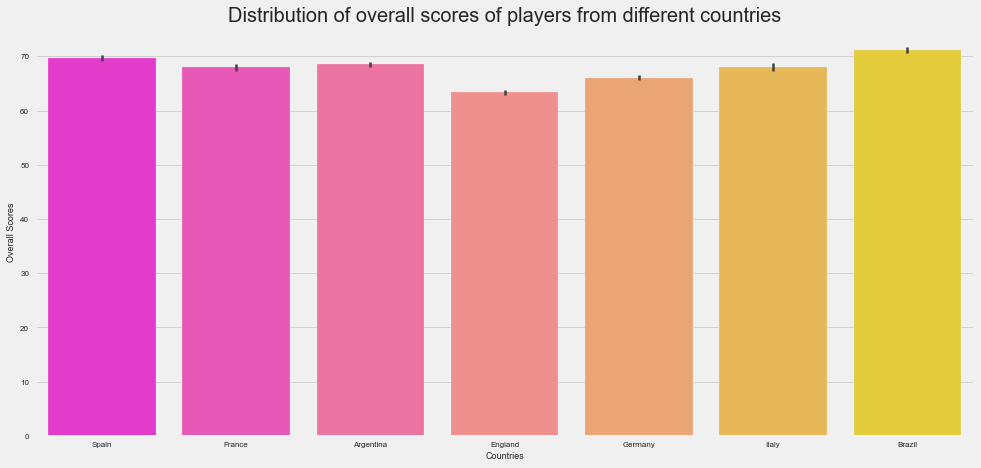

In [458]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = raw_data.loc[raw_data['Nationality'].isin(some_countries) & raw_data['Overall']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

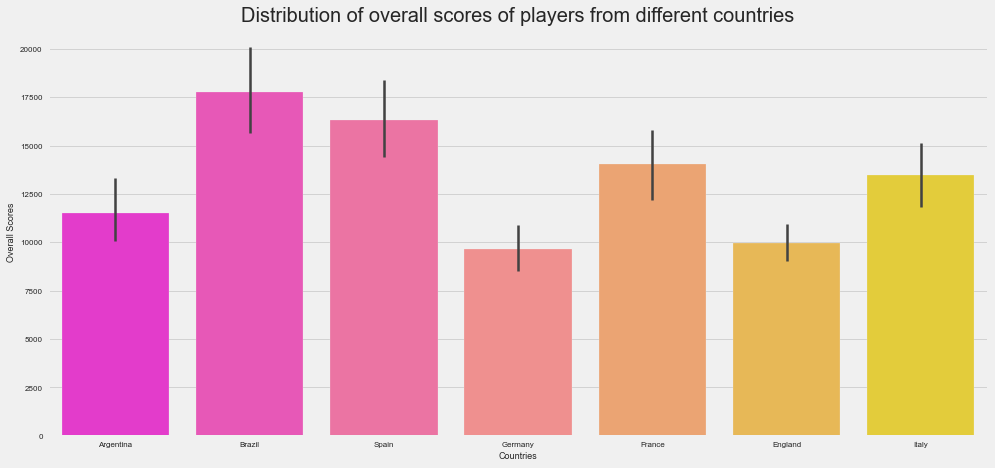

In [459]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = raw_data.loc[raw_data['Nationality'].isin(some_countries) & raw_data['Wage']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

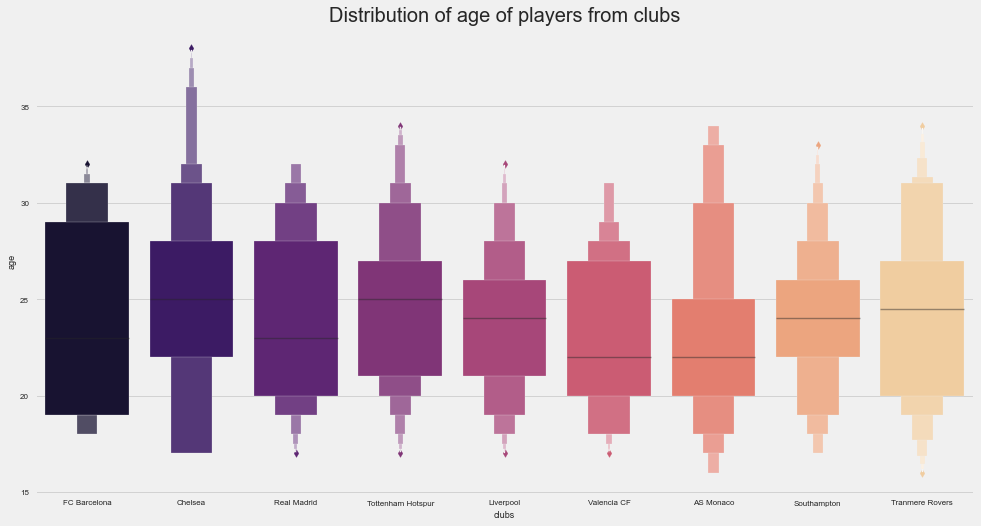

In [460]:
some_clubs = ('Liverpool', 'Southampton', 'Manchestar Untied', 'AS Monaco', 'Tranmere Rovers', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_club = raw_data.loc[raw_data['Club'].isin(some_clubs) & raw_data['Wage']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'age', fontsize = 9)
ax.set_title(label = 'Distribution of age of players from clubs', fontsize = 20)
plt.show()

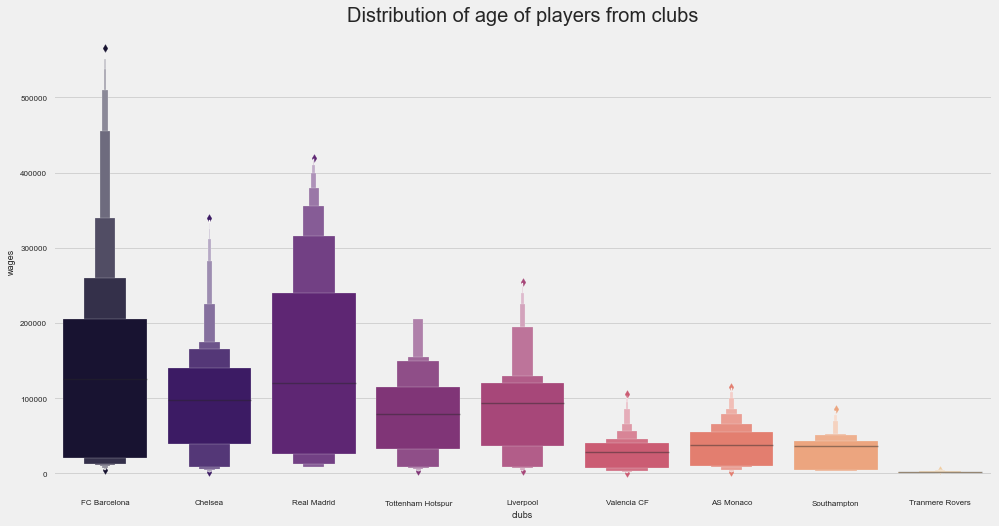

In [461]:
some_clubs = ('Liverpool', 'Southampton', 'Manchestar Untied', 'AS Monaco', 'Tranmere Rovers', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = raw_data.loc[raw_data['Club'].isin(some_clubs) & raw_data['Wage']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'wages', fontsize = 9)
ax.set_title(label = 'Distribution of age of players from clubs', fontsize = 20)
plt.show()

In [462]:
raw_data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
18206,G. Nugent,16,Tranmere Rovers,England
17743,J. Olstad,16,Sarpsborg 08 FF,Norway
13293,H. Massengo,16,AS Monaco,France
16081,J. Italiano,16,Perth Glory,Australia
18166,N. Ayéva,16,Örebro SK,Sweden
17712,K. Broda,16,Wisła Kraków,Poland
17354,L. D'Arrigo,16,Adelaide United,Australia
13567,Y. Verschaeren,16,RSC Anderlecht,Belgium
16927,B. Nygren,16,IFK Göteborg,Sweden
18018,B. O'Gorman,16,Bray Wanderers,Republic of Ireland


In [463]:
raw_data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
4741,O. Pérez,45,Pachuca,Mexico
18183,K. Pilkington,44,Cambridge United,England
17726,T. Warner,44,Accrington Stanley,Trinidad & Tobago
10545,S. Narazaki,42,Nagoya Grampus,Japan
7225,C. Muñoz,41,CD Universidad de Concepción,Argentina
1120,J. Villar,41,0,Paraguay
12192,H. Sulaimani,41,Ohod Club,Saudi Arabia
15426,M. Tyler,41,Peterborough United,England
4228,B. Nivet,41,ESTAC Troyes,France
10356,F. Kippe,40,Lillestrøm SK,Norway


In [464]:
raw_data.sort_values('SprintSpeed', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
55,L. Sané,22,Manchester City,Germany
25,K. Mbappé,19,Paris Saint-Germain,France
1968,Adama,22,Wolverhampton Wanderers,Spain
36,G. Bale,28,Real Madrid,Wales
10928,Maicon,25,Livorno,Brazil
33,P. Aubameyang,29,Arsenal,Gabon
1741,J. Damm,25,Tigres U.A.N.L.,Mexico
1489,I. Bebou,24,Hannover 96,Togo
1835,T. Bifouma,26,MKE Ankaragücü,Congo
2165,C. Njie,24,Olympique de Marseille,Cameroon


In [465]:
raw_data.sort_values('SprintSpeed', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
13261,H. Al Mansour,25,Al Nassr,Saudi Arabia
13248,L. McCullough,24,Tranmere Rovers,Northern Ireland
13241,K. Dankowski,21,Śląsk Wrocław,Poland
13278,C. Mamengi,17,FC Utrecht,Netherlands
13277,J. Rebolledo,26,Deportes Iquique,Chile
13276,M. Al Amri,26,Al Raed,Saudi Arabia
13262,H. Paul,24,TSV 1860 München,Germany
13275,E. González,23,Boyacá Chicó FC,Venezuela
13274,A. Abruscia,27,TSV 1860 München,Italy
13273,B. Lepistu,25,Kristiansund BK,Estonia


In [466]:
raw_data.sort_values('Finishing', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
16,H. Kane,24,Tottenham Hotspur,England
1,Cristiano Ronaldo,33,Juventus,Portugal
7,L. Suárez,31,FC Barcelona,Uruguay
23,S. Agüero,30,Manchester City,Argentina
38,G. Higuaín,30,Milan,Argentina
10,R. Lewandowski,29,FC Bayern München,Poland
43,M. Icardi,25,Inter,Argentina
26,M. Salah,26,Liverpool,Egypt
17,A. Griezmann,27,Atlético Madrid,France


In [467]:
raw_data.sort_values('Finishing', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
13268,L. Garguła,37,Miedź Legnica,Poland
13237,J. Barrera,29,Boyacá Chicó FC,Nicaragua
13267,F. Jaramillo,22,Itagüí Leones FC,Colombia
13266,L. Bengtsson,20,Hammarby IF,Sweden
13265,D. Gardner,28,Oldham Athletic,England
13238,J. Stead,35,Notts County,England
13239,A. Semprini,20,Brescia,Italy
13264,M. Chergui,29,Grenoble Foot 38,France
13263,S. Bauer,25,FC Admira Wacker Mödling,Austria
13262,H. Paul,24,TSV 1860 München,Germany


In [468]:
raw_data.sort_values('FKAccuracy', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
293,S. Giovinco,31,Toronto FC,Italy
72,M. Pjanić,28,Juventus,Bosnia Herzegovina
1113,E. Bardhi,22,Levante UD,FYR Macedonia
90,Parejo,29,Valencia CF,Spain
449,H. Çalhanoğlu,24,Milan,Turkey
124,M. Depay,24,Olympique Lyonnais,Netherlands
15,P. Dybala,24,Juventus,Argentina
3550,S. Nakamura,40,Júbilo Iwata,Japan
166,Anderson Talisca,24,Guangzhou Evergrande Taobao FC,Brazil


In [469]:
raw_data.sort_values('Penalties', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
206,M. Balotelli,27,OGC Nice,Italy
118,Fabinho,24,Liverpool,Brazil
16,H. Kane,24,Tottenham Hotspur,England
823,R. Jiménez,27,Wolverhampton Wanderers,Mexico
945,L. Baines,33,Everton,England
507,R. Boudebouz,28,Real Betis,Algeria
384,D. Perotti,29,Roma,Argentina
297,M. Kruse,30,SV Werder Bremen,Germany
109,Z. Ibrahimović,36,LA Galaxy,Sweden
3199,Edinho,35,CD Feirense,Portugal


In [470]:
raw_data.sort_values('Dribbling', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
2,Neymar Jr,26,Paris Saint-Germain,Brazil
5,E. Hazard,27,Chelsea,Belgium
30,Isco,26,Real Madrid,Spain
94,Y. Brahimi,28,FC Porto,Algeria
56,Bernardo Silva,23,Manchester City,Portugal
65,Douglas Costa,27,Juventus,Brazil
15,P. Dybala,24,Juventus,Argentina
32,Coutinho,26,FC Barcelona,Brazil
84,R. Mahrez,27,Manchester City,Algeria


In [471]:
raw_data.sort_values('Crossing', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
4,K. De Bruyne,27,Manchester City,Belgium
153,Quaresma,34,Beşiktaş JK,Portugal
291,A. Kolarov,32,Roma,Serbia
797,P. Max,24,FC Augsburg,Germany
390,Pedro León,31,SD Eibar,Spain
290,K. Trippier,27,Tottenham Hotspur,England
82,J. Kimmich,23,FC Bayern München,Germany
35,Marcelo,30,Real Madrid,Brazil
28,J. Rodríguez,26,FC Bayern München,Colombia
894,J. Ward-Prowse,23,Southampton,England


In [472]:
raw_data.sort_values('ShotPower', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
378,Hulk,31,Shanghai SIPG FC,Brazil
1348,F. Guarín,32,Shanghai Greenland Shenhua FC,Colombia
890,L. Podolski,33,Vissel Kobe,Germany
102,Naldo,35,FC Schalke 04,Brazil
36,G. Bale,28,Real Madrid,Wales
4,K. De Bruyne,27,Manchester City,Belgium
291,A. Kolarov,32,Roma,Serbia
109,Z. Ibrahimović,36,LA Galaxy,Sweden
3921,V. Ayala,30,Gimnasia y Esgrima La Plata,Paraguay


In [473]:
raw_data.sort_values('Vision', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
4,K. De Bruyne,27,Manchester City,Belgium
76,Iniesta,34,Vissel Kobe,Spain
6,L. Modrić,32,Real Madrid,Croatia
13,David Silva,32,Manchester City,Spain
219,Cesc Fàbregas,31,Chelsea,Spain
31,C. Eriksen,26,Tottenham Hotspur,Denmark
74,M. Özil,29,Arsenal,Germany
32,Coutinho,26,FC Barcelona,Brazil
5,E. Hazard,27,Chelsea,Belgium


In [474]:
raw_data.sort_values('BallControl', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
2,Neymar Jr,26,Paris Saint-Germain,Brazil
30,Isco,26,Real Madrid,Spain
13,David Silva,32,Manchester City,Spain
5,E. Hazard,27,Chelsea,Belgium
1,Cristiano Ronaldo,33,Juventus,Portugal
29,L. Insigne,27,Napoli,Italy
6,L. Modrić,32,Real Madrid,Croatia
76,Iniesta,34,Vissel Kobe,Spain
35,Marcelo,30,Real Madrid,Brazil


In [475]:
raw_data.sort_values('Stamina', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
562,F. Kessié,21,Milan,Ivory Coast
751,M. Eggestein,21,SV Werder Bremen,Germany
14,N. Kanté,27,Chelsea,France
1192,A. Schöpf,24,FC Schalke 04,Austria
190,Allan,27,Napoli,Brazil
5676,R. Murawski,24,Palermo,Poland
836,V. Darida,27,Hertha BSC,Czech Republic
406,H. Herrera,28,FC Porto,Mexico
103,B. Matuidi,31,Juventus,France
587,R. Battaglia,26,Sporting CP,Argentina


In [476]:
raw_data.sort_values('LongPassing', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
11,T. Kroos,28,Real Madrid,Germany
4,K. De Bruyne,27,Manchester City,Belgium
53,I. Rakitić,30,FC Barcelona,Croatia
45,P. Pogba,25,Manchester United,France
86,Koke,26,Atlético Madrid,Spain
63,M. Verratti,25,Paris Saint-Germain,Italy
171,H. Ziyech,25,Ajax,Morocco
219,Cesc Fàbregas,31,Chelsea,Spain
31,C. Eriksen,26,Tottenham Hotspur,Denmark
6,L. Modrić,32,Real Madrid,Croatia


In [477]:
raw_data.sort_values('ShortPassing', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
13,David Silva,32,Manchester City,Spain
6,L. Modrić,32,Real Madrid,Croatia
4,K. De Bruyne,27,Manchester City,Belgium
11,T. Kroos,28,Real Madrid,Germany
31,C. Eriksen,26,Tottenham Hotspur,Denmark
0,L. Messi,31,FC Barcelona,Argentina
86,Koke,26,Atlético Madrid,Spain
90,Parejo,29,Valencia CF,Spain
63,M. Verratti,25,Paris Saint-Germain,Italy
67,Thiago,27,FC Bayern München,Spain


In [478]:
raw_data.sort_values('Marking', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15).style.background_gradient('viridis')

,Name,Age,Club,Nationality
152,A. Barzagli,37,Juventus,Italy
24,G. Chiellini,33,Juventus,Italy
77,M. Škriniar,23,Inter,Slovakia
44,K. Koulibaly,27,Napoli,Senegal
54,Piqué,31,FC Barcelona,Spain
104,Miranda,33,Inter,Brazil
20,Sergio Busquets,29,FC Barcelona,Spain
223,D. De Rossi,34,Roma,Italy
51,J. Vertonghen,31,Tottenham Hotspur,Belgium
71,T. Alderweireld,29,Tottenham Hotspur,Belgium


In [479]:
player_features = ('Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes')

for i, val in raw_data.groupby(raw_data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position 0: Balance, Agility, Acceleration
Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, StandingTackle
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, StandingTackle
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: SprintSpeed, Acceleration, Stamina
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Stamina, ShortPassi

C:\Users\Admin\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [480]:
raw_data[raw_data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('viridis')

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


In [481]:
raw_data[raw_data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10).style.background_gradient('viridis')

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


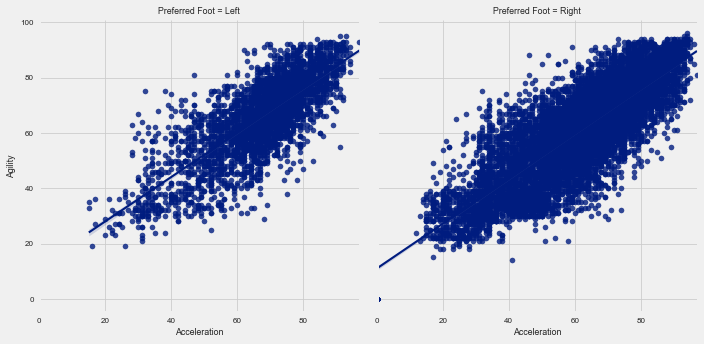

In [482]:
sns.lmplot(x = 'Acceleration', y = 'Agility', data = raw_data, col = 'Preferred Foot')
plt.show()

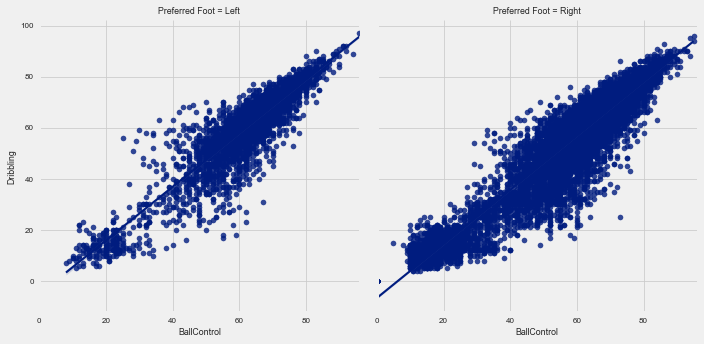

In [483]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = raw_data, col = 'Preferred Foot')
plt.show()

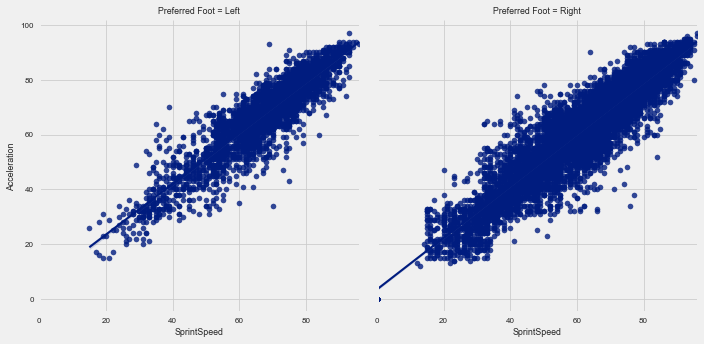

In [484]:
sns.lmplot(x = 'SprintSpeed', y = 'Acceleration', data = raw_data, col = 'Preferred Foot')
plt.show()

In [485]:
def playerdata(x):
    return raw_data.loc[x,:]
x = playerdata(18206)
x

Unnamed: 0                                                           18206
ID                                                                  246269
Name                                                             G. Nugent
Age                                                                     16
Photo                       https://cdn.sofifa.org/players/4/19/246269.png
Nationality                                                        England
Flag                                   https://cdn.sofifa.org/flags/14.png
Overall                                                                 46
Potential                                                               66
Club                                                       Tranmere Rovers
Club Logo                   https://cdn.sofifa.org/teams/2/light/15048.png
Value                                                                60000
Wage                                                                  1000
Special                  